In [1]:
%matplotlib notebook

import pandas as pd
import numpy as snp
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

df=pd.read_csv(r"D:\uni\Teaching Assistant\Statistical Quality Control\1400-2\3. Problem Solving - QC Charts\tehranairaghdasie.csv")
df.head()

,Date,O3 ppb,CO ppm,NO2 ppb,SO2 ppb,PM 10 ug/m3,PM 2.5 ug/m3
0,1398/06/01,0.34,2,0.043,4,42,13
1,1398/06/02,0.32,2,0.053,4,43,16
2,1398/06/03,0.39,2,0.053,5,52,17
3,1398/06/04,0.29,2,0.067,5,52,18
4,1398/06/05,0.24,2,0.063,6,53,18


# NO2 Data Q2

<IPython.core.display.Javascript object>


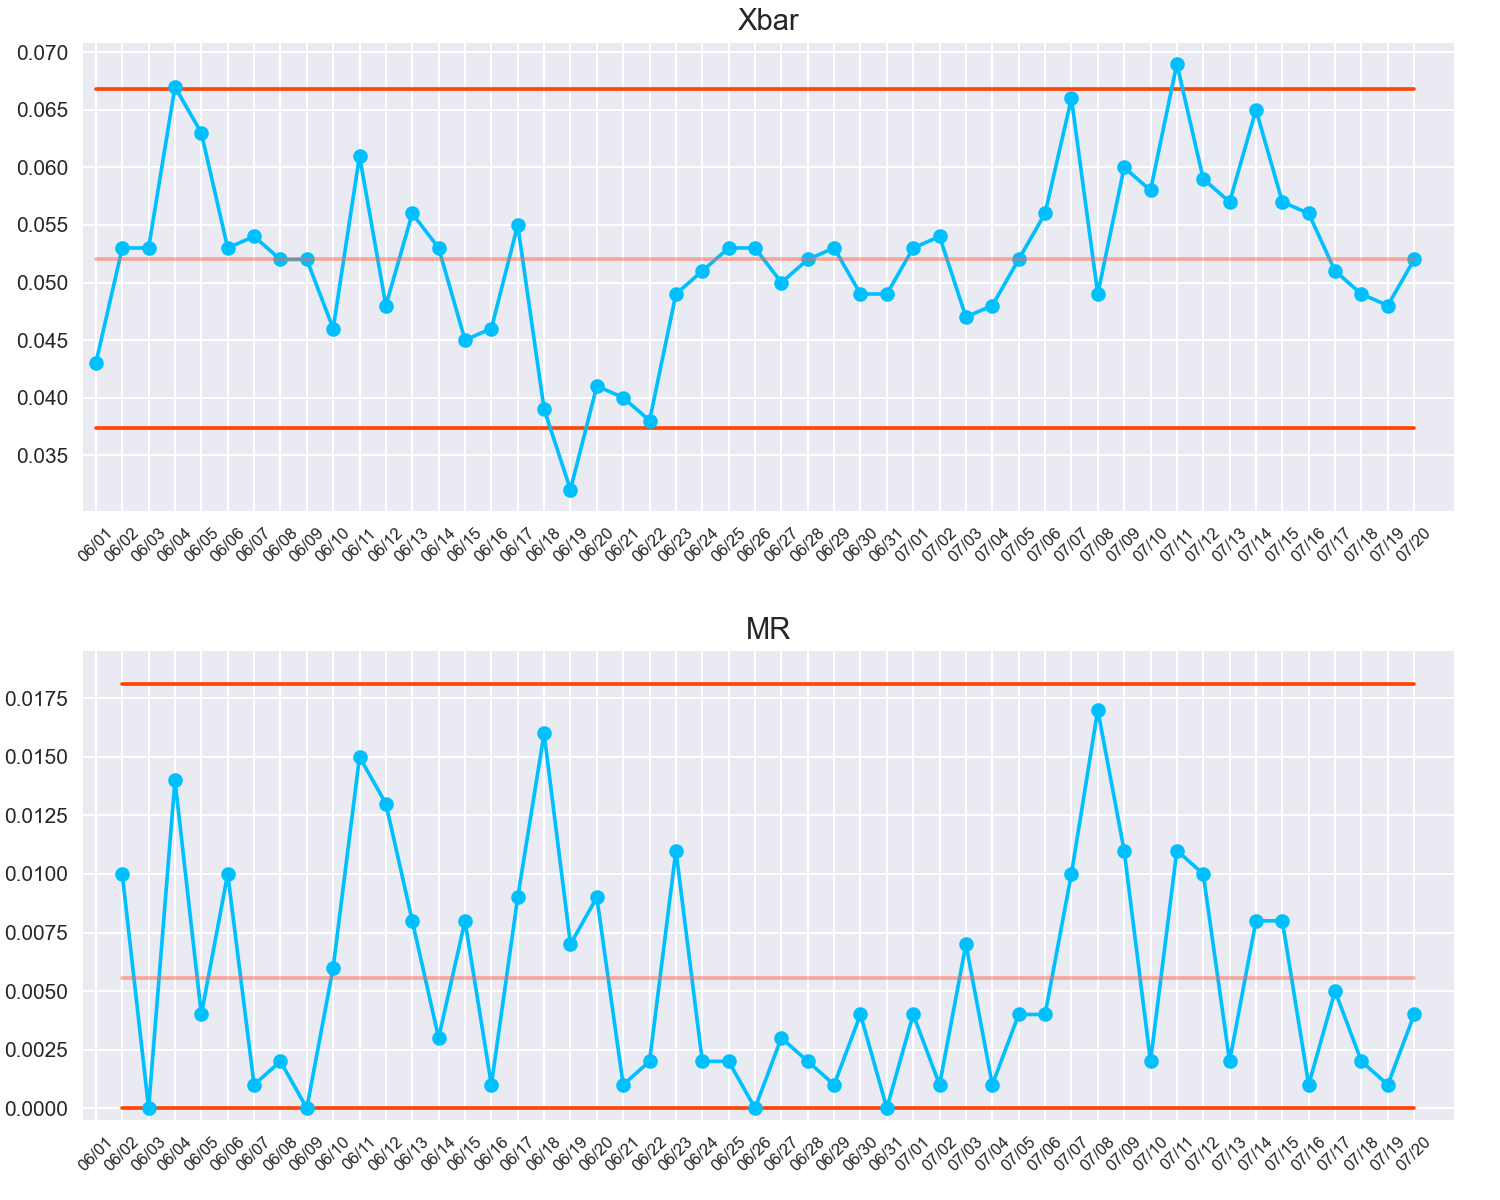

In [2]:
df1= df[['Date' , 'NO2 ppb']]
def date_func(row):
    row['MonthDay']=str(row['Date'])[-5:]
    return row
df1=df1.apply(date_func,axis=1)


#stage1: Xbar Chart Calculations
df1['Xbar']=np.mean(df1['NO2 ppb'])
df1['MR']=np.zeros(len(df1))
for i in range(1 , len(df1)):
    df1.loc[i,'MR']=np.absolute(df1.loc[i,'NO2 ppb']-df1.loc[i-1,'NO2 ppb'])
MR_bar=np.mean(df1.loc[1:,'MR'])
df1['MR_bar']=MR_bar
df1['UCL Xbar']=df1['Xbar']+3*df1['MR_bar']/1.128
df1['LCL Xbar']=df1['Xbar']-3*df1['MR_bar']/1.128

#stage2: MR chart calc
df1['UCL MR']=3.267*df1['MR_bar']
df1['LCL MR']=np.zeros(len(df1))
df1.loc[0, ['MR' ,'MR_bar' , 'UCL MR' , 'LCL MR']]=np.nan

#stage3: Plotting 2 charts together
plt.style.use('seaborn')
fig , (ax1 , ax2)=plt.subplots(nrows=2 , ncols=1)
plt.tight_layout()
fig.set_figwidth(10)
fig.set_figheight(8)

#Xbar Plot
ax1.plot(np.arange(len(df1)) , df1['UCL Xbar'] , c='orangered' , label='UCL')
ax1.plot(np.arange(len(df1)) , df1['LCL Xbar'] , c='orangered' , label='LCL')
ax1.plot(np.arange(len(df1)) , df1['NO2 ppb'] , c='deepskyblue' , label='data' , marker='o')
ax1.plot(np.arange(len(df1)) , df1['Xbar'] , c='tomato' , label='CL' , alpha=0.5)
ax1.set_xlim([-0.5 , len(df1)+0.5])
ax1.set_title('Xbar' , fontsize=14)
ax1.set_xticks(range(0,len(df1)))
ax1.set_xticklabels(labels=df1['MonthDay'],fontsize=8,rotation=45)

#MR plot
ax2.plot(np.arange(len(df1)) , df1['UCL MR'] , c='orangered' , label='UCL')
ax2.plot(np.arange(len(df1)) , df1['LCL MR'] , c='orangered' , label='LCL')
ax2.plot(np.arange(len(df1)) , df1['MR'] , c='deepskyblue' , label='data' , marker='o')
ax2.plot(np.arange(len(df1)) , df1['MR_bar'] , c='tomato' , label='CL' , alpha=0.5)
ax2.set_xlim([-0.5 , len(df1)+0.5])
ax2.set_title('MR' , fontsize=14)
ax2.set_xticks(range(0,len(df1)))
ax2.set_xticklabels(labels=df1['MonthDay'],fontsize=8,rotation=45);
ax2.set_ylim([-0.0005 , 0.0195])
plt.subplots_adjust(hspace=0.3)
plt.show()

# Revised O3 Data Q2

<IPython.core.display.Javascript object>


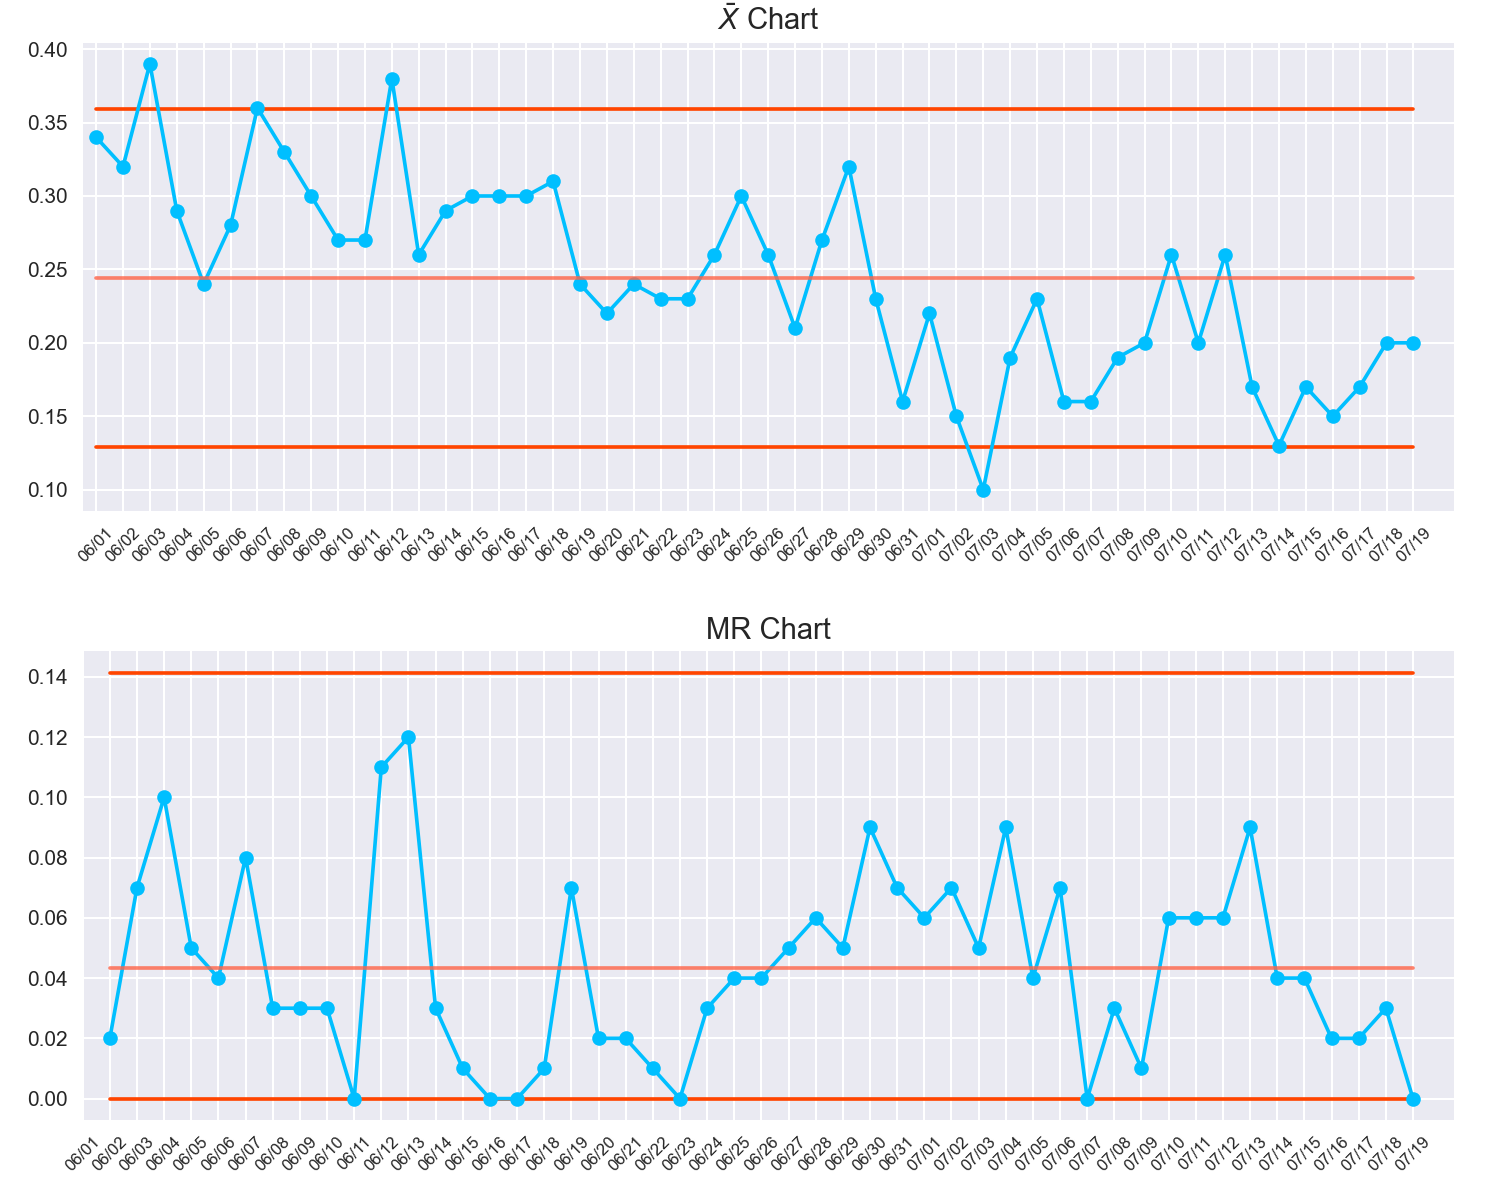

In [3]:
df2=df[['Date' , 'O3 ppb']].head(len(df)-1)

def date_func(row): #extracting Month-Day from Date for visualization
    row['MonthDay']=str(row['Date'])[-5:]
    return row
df2=df2.apply(date_func , axis=1)



#stage1: Xbar Chart Calculations
df2['Xbar']=np.mean(df2['O3 ppb'])
df2['MR']=np.zeros(len(df2))
df2['MR'].loc[1:]=[np.absolute(df2.loc[i,'O3 ppb']-df2.loc[i-1,'O3 ppb']) for i in range(1,len(df2))]
MR_bar=np.mean(df2.loc[1:,'MR'])
df2['MR_bar']=MR_bar
df2['UCL Xbar']=df2['Xbar']+3*df2['MR_bar']/1.128
df2['LCL Xbar']=df2['Xbar']-3*df2['MR_bar']/1.128

#Stage2: MR chart Calc
df2['UCL MR']=3.267*df2['MR_bar']
df2['LCL MR']=np.zeros(len(df2))
df2.loc[0 , ['MR','MR_bar' , 'UCL MR' , 'LCL MR']]=np.nan



#Stage3: Plotting 2 Charts together
plt.style.use('seaborn')
fig , (ax1,ax2)=plt.subplots(nrows=2 , ncols=1)
plt.tight_layout()
fig.set_figwidth(10)
fig.set_figheight(8)


#Xbar Plot
ax1.plot(np.arange(0,len(df2)) , df2['UCL Xbar'] , c='orangered' , label='UCL');
ax1.plot(np.arange(0,len(df2)) , df2['LCL Xbar'] , c='orangered' , label='LCL');
ax1.plot(np.arange(0,len(df2)) , df2['O3 ppb'] , c='deepskyblue' , label='data' , marker='o');
ax1.plot(np.arange(0,len(df2)) , df2['Xbar'] , c='tomato' , label='CL' , alpha=0.8);
ax1.set_xlim([-0.5,len(df2)+0.5]);
ax1.set_title(r'$\bar{X}$ Chart' , fontsize=14);

ax1.set_xticks(range(0,len(df2)))
ax1.set_xticklabels(labels=df2['MonthDay'].to_list() , rotation=45 , fontsize=8)


# MR Plot
ax2.plot(np.arange(0,len(df2)) , df2['UCL MR'] , c='orangered' , label='UCL');
ax2.plot(np.arange(0,len(df2)) , df2['LCL MR'] , c='orangered' , label='LCL');
ax2.plot(np.arange(0,len(df2)) , df2['MR'] , c='deepskyblue' , label='data' , marker='o');
ax2.plot(np.arange(0,len(df2)) , df2['MR_bar'] , c='tomato' , label='CL' , alpha=0.8);
ax2.set_xlim([0.5,len(df2)+0.5]);
ax2.set_title(r'MR Chart' , fontsize=14);


ax2.set_xticks(range(0,len(df2)))
ax2.set_xticklabels(labels=df2['MonthDay'].to_list() , rotation=45 , fontsize=8)

plt.subplots_adjust(hspace=0.3)
plt.show();

# NO2 Specification Limit

<IPython.core.display.Javascript object>


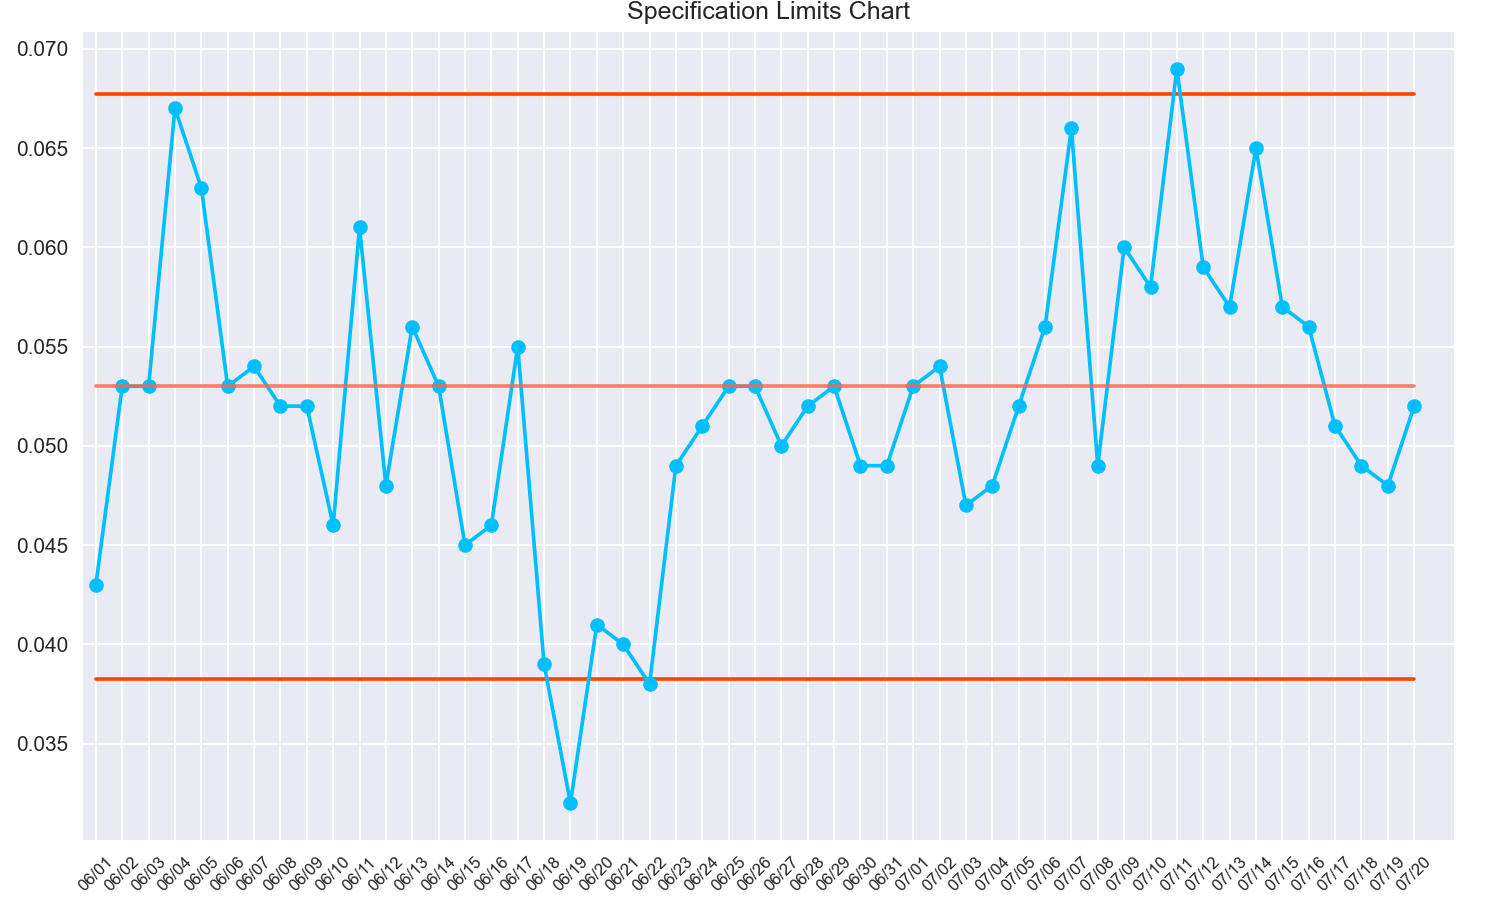

In [4]:
#stage1: Xbar Chart Calculations
df1['Xbar']=0.053
df1['MR']=np.zeros(len(df1))
df1['MR'].loc[1:]=[np.absolute(df1.loc[i,'NO2 ppb']-df1.loc[i-1,'NO2 ppb']) for i in range(1,len(df1))]
MR_bar=np.mean(df1.loc[1:,'MR'])
df1['MR_bar']=MR_bar
df1['USL Xbar']=df1['Xbar']+3*df1['MR_bar']/1.128
df1['LSL Xbar']=df1['Xbar']-3*df1['MR_bar']/1.128


#Stage2: Plotting
plt.style.use('seaborn')
fig , ax1=plt.subplots(nrows=1 , ncols=1 )
plt.tight_layout()
fig.set_figwidth(10)
fig.set_figheight(6)


#Xbar Plot
ax1.plot(np.arange(0,len(df1)) , df1['USL Xbar'] , c='orangered' , label='USL');
ax1.plot(np.arange(0,len(df1)) , df1['LSL Xbar'] , c='orangered' , label='LSL');
ax1.plot(np.arange(0,len(df1)) , df1['NO2 ppb'] , c='deepskyblue' , label='data' , marker='o');
ax1.plot(np.arange(0,len(df1)) , df1['Xbar'] , c='tomato' , label='CL' , alpha=0.8);
ax1.set_xlim([-0.5,len(df1)+0.5]);
ax1.set_title(r'Specification Limits Chart' , fontsize=12);

ax1.set_xticks(range(0,len(df1)))
ax1.set_xticklabels(labels=df1['MonthDay'].to_list() , rotation=45 , fontsize=8)

plt.show()

# Revised O3 Specification Limit

<IPython.core.display.Javascript object>


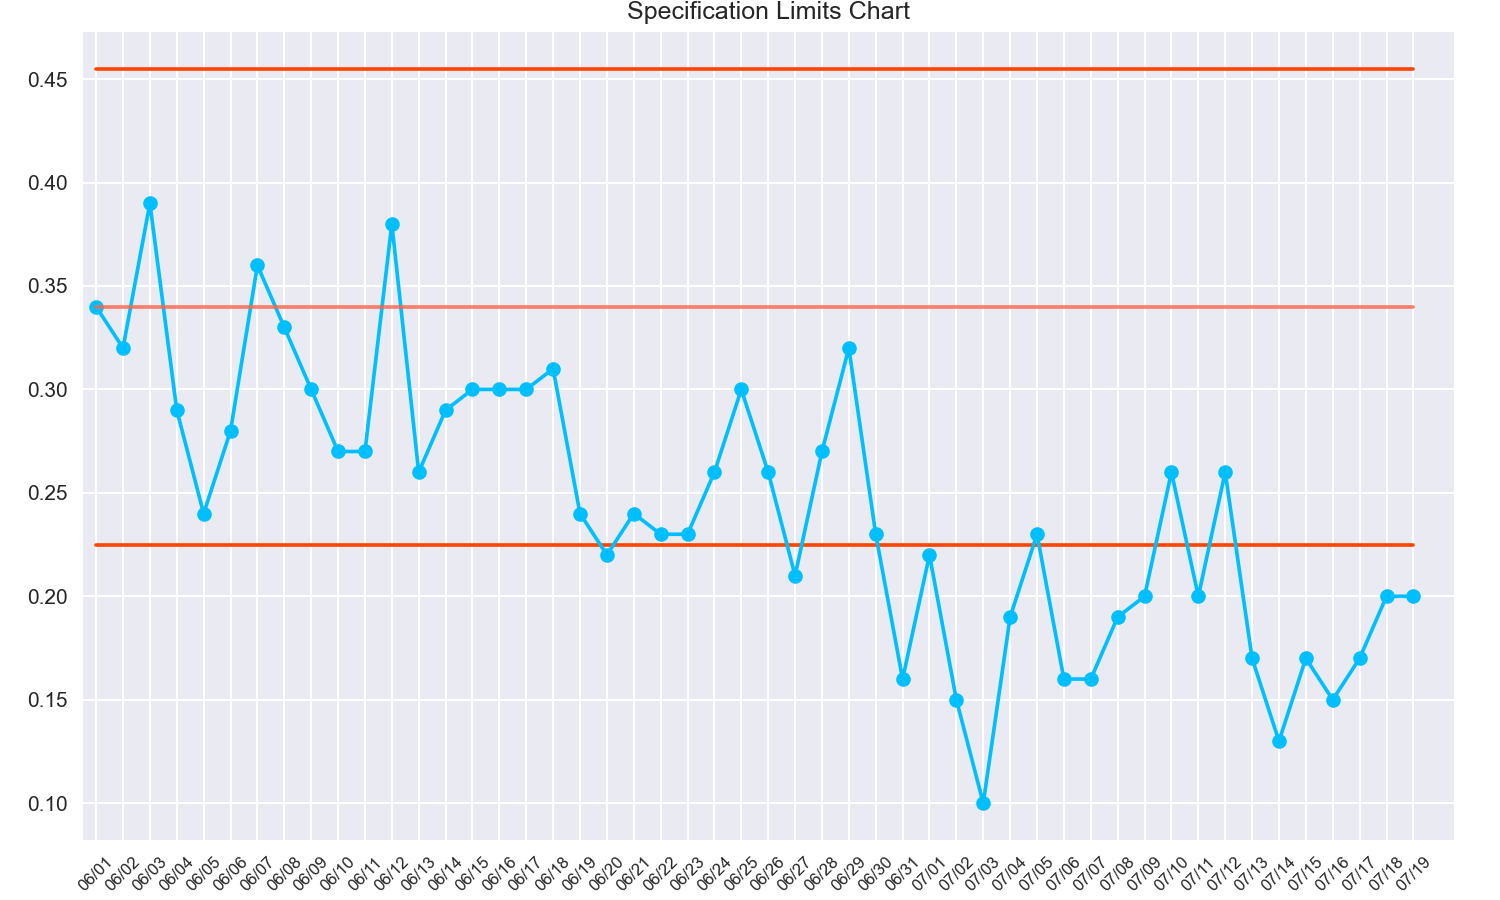

In [5]:
#stage1: Xbar Chart Calculations
df2['Xbar']=0.34
df2['MR']=np.zeros(len(df2))
df2['MR'].loc[1:]=[np.absolute(df2.loc[i,'O3 ppb']-df2.loc[i-1,'O3 ppb']) for i in range(1,len(df2))]
MR_bar=np.mean(df2.loc[1:,'MR'])
df2['MR_bar']=MR_bar
df2['USL Xbar']=df2['Xbar']+3*df2['MR_bar']/1.128
df2['LSL Xbar']=df2['Xbar']-3*df2['MR_bar']/1.128


#Stage2: Plotting 
plt.style.use('seaborn')
fig , ax1=plt.subplots(nrows=1 , ncols=1)
plt.tight_layout()
fig.set_figwidth(10)
fig.set_figheight(6)


#Xbar Plot
ax1.plot(np.arange(0,len(df2)) , df2['USL Xbar'] , c='orangered' , label='USL');
ax1.plot(np.arange(0,len(df2)) , df2['LSL Xbar'] , c='orangered' , label='LSL');
ax1.plot(np.arange(0,len(df2)) , df2['O3 ppb'] , c='deepskyblue' , label='data' , marker='o');
ax1.plot(np.arange(0,len(df2)) , df2['Xbar'] , c='tomato' , label='CL' , alpha=0.8);
ax1.set_xlim([-0.5,len(df2)+0.5]);
ax1.set_title(r'Specification Limits Chart' , fontsize=12);

ax1.set_xticks(range(0,len(df2)))
ax1.set_xticklabels(labels=df2['MonthDay'].to_list() , rotation=45 , fontsize=8)

plt.show()